In [136]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler, # No impact
    StandardScaler, # Best combination
    RobustScaler, # No impact
    MaxAbsScaler, # No impact
    QuantileTransformer, # Not good
    PowerTransformer,
    Normalizer, # Not good
    FunctionTransformer,
    KBinsDiscretizer
)

import joblib

import statsmodels.api as sm #suite of models we can use
import statsmodels.tools # contains... well, tools for models, such as evaluation functions

In [137]:
df = pd.read_csv('Life Expectancy Data.csv')

In [138]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [139]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [140]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [141]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [142]:
df.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [143]:
df.groupby(by = "Country").count().sort_values(by = "Region", ascending = True)


,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Nepal,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Netherlands,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
New Zealand,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Nicaragua,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Germany,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Ghana,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Greece,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [144]:
df[df.Country == 'Afghanistan']

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
68,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.020,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
175,Afghanistan,Asia,2014,55.2,73.6,231.9780,0.010,62,44,23.2,...,62,0.03,565,33.37,17.5,17.5,3.5,0,1,63.0
351,Afghanistan,Asia,2013,57.3,76.9,236.2210,0.010,64,38,23.0,...,64,0.03,569,32.27,17.7,17.7,3.5,0,1,62.5
462,Afghanistan,Asia,2008,69.2,95.7,259.8060,0.028,64,23,22.5,...,64,0.02,399,27.72,18.8,18.9,3.0,0,1,59.9
614,Afghanistan,Asia,2006,74.6,104.1,271.4905,0.026,64,18,22.3,...,58,0.02,354,26.43,19.2,19.3,2.7,0,1,58.8
679,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.020,64,14,21.9,...,36,0.02,320,22.60,19.9,2.2,2.3,0,1,56.8
998,Afghanistan,Asia,2005,77.3,108.4,278.3395,0.016,66,17,22.2,...,58,0.02,346,25.65,19.3,19.5,2.6,0,1,58.3
1059,Afghanistan,Asia,2010,64.2,87.8,250.1350,0.020,66,29,22.7,...,66,0.02,526,29.19,18.4,18.4,3.2,0,1,61.0
1066,Afghanistan,Asia,2015,53.2,70.4,227.7350,0.000,65,42,23.3,...,65,0.03,556,34.41,17.2,17.3,3.6,0,1,63.4
1147,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.020,67,16,22.1,...,50,0.02,323,24.73,19.5,19.7,2.5,0,1,57.8


In [145]:
def remove_outliers(df, col):
    outlier = 1.5
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower = q1 - outlier * iqr
    upper = q3 + outlier * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]
    

<Axes: xlabel='Infant_deaths'>

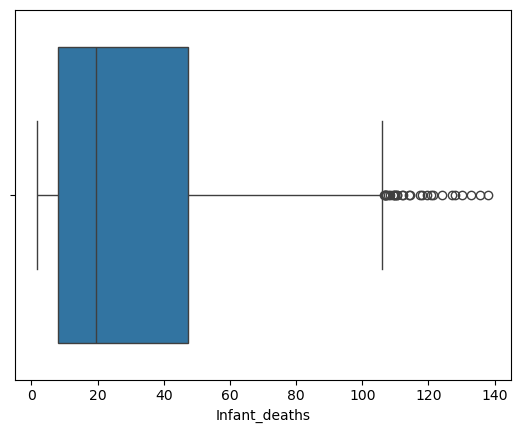

In [146]:
#sns.pairplot(df)
df.Infant_deaths.describe()
sns.boxplot(data = df.Infant_deaths, orient = 'h')

<Axes: xlabel='Adult_mortality'>

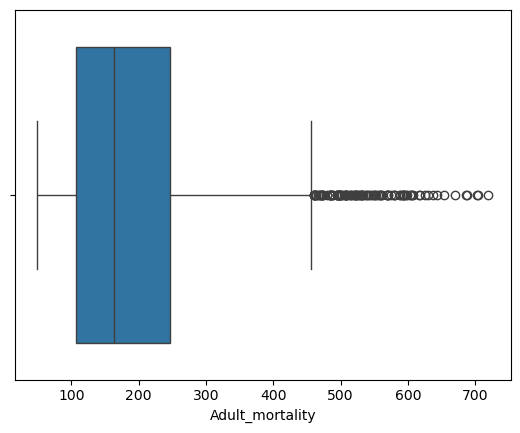

In [147]:
#sns.pairplot(df)
df.Adult_mortality.describe()
sns.boxplot(data = df.Adult_mortality, orient = 'h')

<Axes: xlabel='GDP_per_capita'>

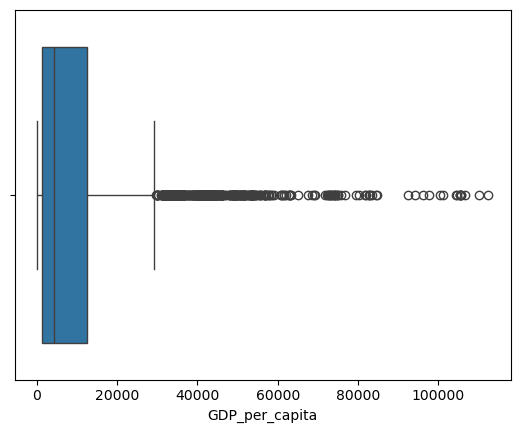

In [148]:
#sns.pairplot(df)
df.GDP_per_capita.describe()
sns.boxplot(data = df.GDP_per_capita, orient = 'h')

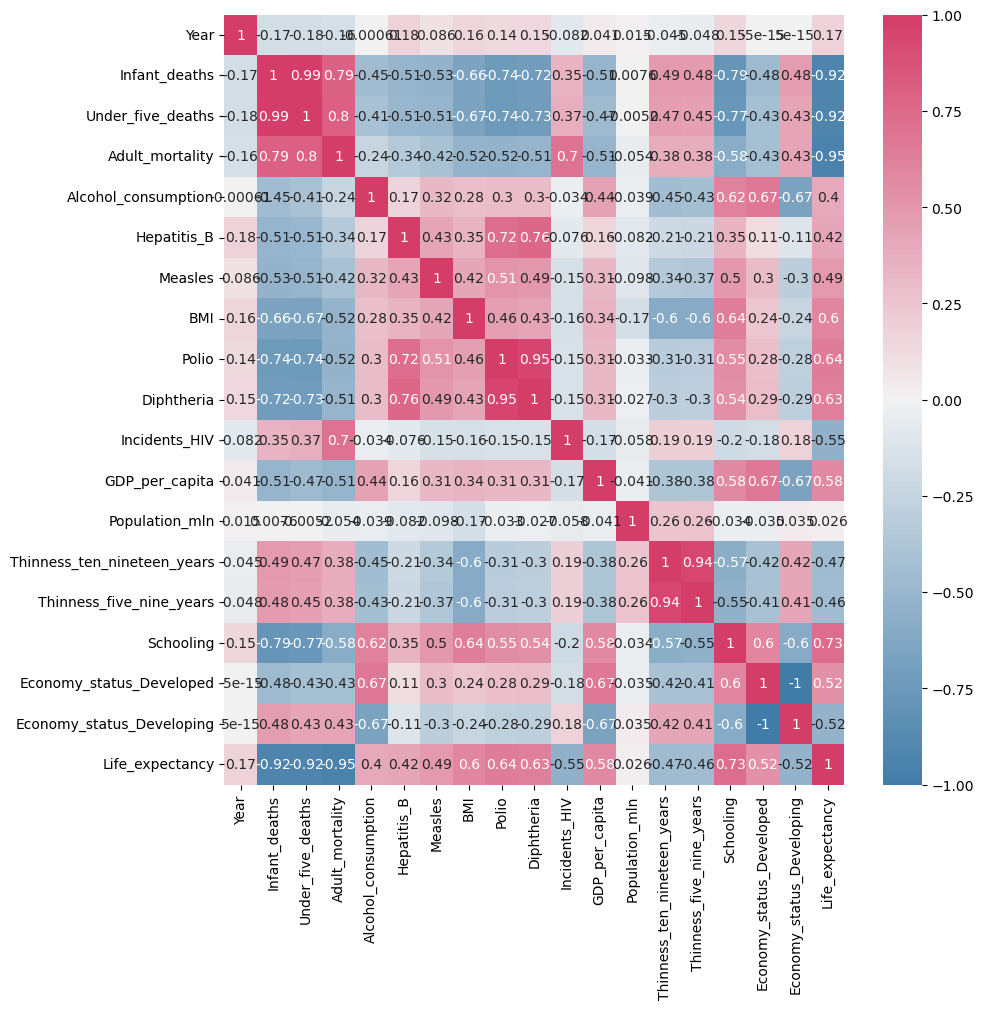

In [149]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap=sns.diverging_palette(240, 0, as_cmap=True))
plt.show()

feature_cols = ['Country',
                 'Region',
                 'Year',
                 'Infant_deaths',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'Alcohol_consumption',
                 'Hepatitis_B',
                 'Measles',
                 'BMI',
                 'Polio',
                 'Diphtheria',
                 'Incidents_HIV',
                 'GDP_per_capita',
                 'Population_mln',
                 'Thinness_ten_nineteen_years',
                 'Thinness_five_nine_years',
                 'Schooling',
                 'Economy_status_Developed',
                 'Economy_status_Developing',
                 'Life_expectancy']
                 

In [150]:
df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'region', dtype = int)
# feature_cols = [ 'Year',
#                  'region_Asia',
#                  'region_Central America and Caribbean',
#                  'region_European Union',
#                  'region_Middle East',
#                  'region_North America',
#                  'region_Oceania',
#                  'region_Rest of Europe',
#                  'region_South America',
#                  'Infant_deaths',
#                  'Adult_mortality',
#                  'GDP_per_capita',
#                  'Population_mln',
#                  'Schooling',
#                  'Economy_status_Developed']

feature_cols = [ 'Year',
                 'region_Asia',
                 'region_Central America and Caribbean',
                 'region_European Union',
                 'region_Middle East',
                 'region_North America',
                 'region_Oceania',
                 'region_Rest of Europe',
                 'region_South America',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'GDP_per_capita',
                 'Economy_status_Developing']

In [151]:
# def feature_eng(df):
#     df = df.copy()
#     df = sm.add_constant(df)

#     scale_cols = feature_cols

#     def minmax(series):
#         return (series - series.min()) / (series.max() - series.min())

#     df[scale_cols] = df[scale_cols].apply(minmax)
    
#     return df

In [152]:
X = df[feature_cols]
X = sm.add_constant(X) # don't forget to add the constant
y = df.Life_expectancy
X.shape

(2864, 14)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
scale_cols = [ 'Year',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'GDP_per_capita',
                 'Economy_status_Developing']
scaler = MinMaxScaler()
scaler.fit(X_train[scale_cols])
joblib.dump(scaler, 'limited_scaler.pkl')

def feature_eng(df, scaler, scale_cols):
    df = df.copy()
    df[scale_cols] = scaler.transform(df[scale_cols])
    df = sm.add_constant(df)
    return df

In [155]:
# X_train = feature_eng(X_train)
# X_test = feature_eng(X_test)

X_train = feature_eng(X_train, scaler, scale_cols)
X_test = feature_eng(X_test, scaler, scale_cols)

In [160]:
lin_reg = sm.OLS(y_train, X_train) # initialising the model object – remember, for sm it's y first and then X
results = lin_reg.fit() # creating an object for the fitted model
joblib.dump(results, 'limited_model.pkl')
y_pred = results.predict(X_train) # adding our predictions back to the table
X_train.head()

,const,Year,region_Asia,region_Central America and Caribbean,region_European Union,region_Middle East,region_North America,region_Oceania,region_Rest of Europe,region_South America,Under_five_deaths,Adult_mortality,GDP_per_capita,Economy_status_Developing
2026,1.0,0.933333,1,0,0,0,0,0,0,0,0.031447,0.094604,0.031585,1.0
651,1.0,0.266667,0,0,1,0,0,0,0,0,0.010332,0.099213,0.124005,0.0
2225,1.0,0.933333,0,0,0,0,0,0,0,1,0.070530,0.143200,0.141694,1.0
2357,1.0,0.666667,0,0,0,0,0,0,1,0,0.049416,0.048224,0.030542,1.0
670,1.0,0.200000,0,0,0,0,0,0,0,0,0.323899,0.682175,0.028057,1.0


In [157]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.014e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -3734.2
No. Observations:                2291   AIC:                             7496.
Df Residuals:                    2277   BIC:                             7577.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   80.1342      0.210    382.080      0.000      79.723      80.545
Year                                     0.4970      0.088      5.670      0.000       0.325       0.669
region_Asia                              0.3626      0.101      3.582      0.000       0.164       0.561
region_Central America and Caribbean     1.9026      0.118     16.119      0.000       1.671       2.134
region_European Union                   -0.6891      0.174     -3.962      0.000      -1.030      -0.348
region_Middle East                       0.0992      0.133      0.746      0.456      -0.161       0.360
region_North America                     0.6788      0.228      2.978      0.003       0.232       1.126
region_Oceania                          -1.1276      0.132     -8.521      0.000      -1.387      -0.868
region_Rest of Europe                    0.4962      0.130      3.820      0.000       0.241       0.751
region_South America                     1.7102      0.130     13.136      0.000       1.455       1.966
Under_five_deaths                      -18.8613      0.248    -75.956      0.000     -19.348     -18.374
Adult_mortality                        -28.6620      0.272   -105.212      0.000     -29.196     -28.128
GDP_per_capita                           3.0448      0.266     11.465      0.000       2.524       3.566
Economy_status_Developing               -3.0186      0.161    -18.708      0.000      -3.335      -2.702
==============================================================================
Omnibus:                       44.454   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.147
Skew:                           0.222   Prob(JB):                     3.20e-14
Kurtosis:                       3.673   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
statsmodels.tools.eval_measures.rmse(y_train, y_pred)

1.2348959075150114

In [159]:
y_test_pred = results.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print('Test RMSE is: ', rmse)

Test RMSE is:  1.2465037974104807
